# Simulating and visualising trajectories

In this chapter, we will discuss how to simulate and visualise a dynamical system. Before we dicuss how to implement specific dynamical systems, we will use a pre-existing implementation of the simple harmonic oscillator in `hdynamics/dynamics/harmonic_oscillator.py` to discuss how we can simulate and plot dynamical systems in our framework. In the next chapters, we will discuss how to implement a new dynamical system from scratch.

## Step 1. Importing a system

Next, we can import the `NBody` system defined in the `hdynamics/dynamics/nbody.py` and create a dynamical system object `nbody`. We will use `dim=2` and `n_bodies=5`, as 2d is amenable to plotting. Feel free to try other values for the number of bodies.

In [2]:
from hdynamics.dynamics.nbody import Nbody
nbody = Nbody(dim=2, n_bodies=3)

## Step 2. Randomly sample initial condition

We can create an initial condition by first creating a JAX random seed `key` and passing it to the dynamical system by running,

In [3]:
import jax
key = jax.random.PRNGKey(0)

x = nbody.initial_phase(key)
print("Shape of initial condition: ", x.shape)
print(x)

Shape of initial condition:  (2, 6)
[[ 1.6226422   2.0252647  -0.43359444 -0.07861735  0.1760909  -0.97208923]
 [-0.49529874  0.4943786   0.6643493  -0.9501635   2.1795304  -1.9551506 ]]


## Step 3. Use JAX autodiff to obtain symplectic form

Thanks to auto differentiation in JAX, we can obtain the gradient of the Hamiltonian defined in `nbody.H()` using the `jax.grad` function and pass it to the `symplectic_form` defined in `utils.py` (please have a look!):

In [81]:
from hdynamics.utils import symplectic_form

jac_h = jax.grad(lambda x: nbody.H(x, eps=0.0001))

grad_x = lambda x, t: symplectic_form(jac_h(x))

In [82]:
x_flat = x.reshape(-1)
print(x_flat)

[ 1.1901639  -1.0996888   0.44367844  0.5984697  -0.39189556  0.69261974
  0.46018356 -2.068578   -0.21438177 -0.9898306  -0.6789304   0.27362573]


## Step 4. Generate trajectory

Next, we can generate a trajectory by by passing the initial condition and the found trajectory gradient to ordinary differential equation solver `ode_int`:

In [86]:
import jax.numpy as jnp

from hdynamics.odeint import ode_int

def generate_trajectory(grad_x, x_start, stepsize=0.01, n_steps=300):
    t_start = 0.0
    t_end = n_steps * stepsize

    t_span = jnp.linspace(t_start, t_end, n_steps + 1)

    solution = ode_int(grad_x, x_start, t_span)

    return solution, t_span

In [87]:
trajectory, t_span = generate_trajectory(grad_x, x_flat)
print('trajectory:', trajectory.shape)

trajectory: (301, 12)


## Step 5. Plotting trajectory

Lastly, we can plot the trajectory of the dynamical system by calling the `plot_trajectory()` function and passing a matplotlib figure:

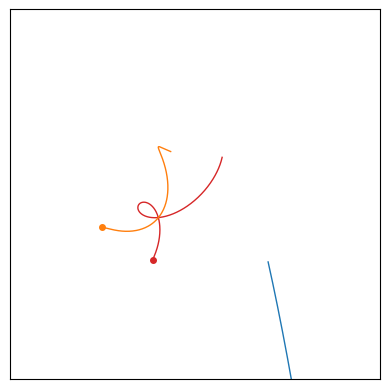

In [88]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

nbody.plot_trajectory(trajectory, t_span, ax)

## We did it!

Great, we did it! We implemented, simulated and visualised the N-body system.

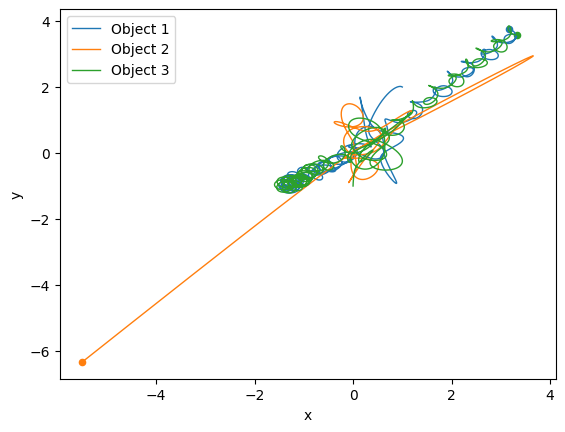

In [ ]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

from hdynamics.dynamics.nbody import Nbody

nbody = Nbody(dim=2, n_bodies=3, masses=jnp.array([10.0, 1.0, 1.0]))


initial_conditions = jnp.array([1, 2, 0, 0, 0, -1, -0.1, 0.1, 0.1, -0.2, 0, 0.1])

trajectory, t_span = nbody.generate_trajectory(initial_conditions, 0.01, 5000)

fig, ax = plt.subplots(1, 1)

nbody.plot_trajectory(trajectory, t_span, ax)